# MILESTONE 2

## i. Perkenalan

Nama : Jovanca Stevani Tanjung

Batch 002 HCK

Model Deployment Link: https://huggingface.co/spaces/jovancast/jovanca-002
---

Objectives:
- be able to understand supervised learning and unsupervised learning concept
- be able to do data preparation to be used in supervised learning and usupervised learning model
- be able to implement supervised learning and unsupervised learning with new dataset
- be able to do model evaluation
- be able to do model tuning
- be able to do model deployment

## ii. Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

from sklearn import set_config
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from feature_engine.outliers import Winsorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error

## iii. Data Loading

In [6]:
#Loading the dataset
df = pd.read_csv('ds_salaries.csv')
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [7]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


`Unnamed: 0` column seems like just a copy of index number, so might as well I drop it.

In [9]:
#Showing the first 5 data from the dataset
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [10]:
#Showing the last 5 data from the dataset
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [11]:
#Checking the dataset information from each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [12]:
#Checking the central tendency from the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,607.0,2021.405272,6.921330e-01,2020.0,2021.0,2022.0,2022.0,2022.0
salary,607.0,324000.062603,1.544357e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,607.0,112297.869852,7.095726e+04,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,4.070913e+01,0.0,50.0,100.0,100.0,100.0


### Data Cleaning

In [13]:
df.duplicated().any()

True

After checking duplicated data, the results shows that there is duplicated data.

In [14]:
duplicated = df[df.duplicated() == True]
df.drop(duplicated.index, inplace=True)
df.reset_index(drop=True)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
560,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
561,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
562,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
563,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


The duplicated data is dropped.

In [15]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

After checking the missing value, the result shows there's no missing value from the dataset.

## iv. Exploratory Data Analysis (EDA)

#### Columns Description :

- `work_year` : The year the salary was paid.
- `experience_level` : The experience level in the job during the year with the following possible values:
    - EN = Entry-level / Junior
    - MI = Mid-level / Intermediate
    - SE = Senior-level / Expert
    - EX = Executive-level / Director
- `employment_type` : The type of employement for the role:
    - PT = Part-time
    - FT = Full-time
    - CT = Contract
    - FL = Freelance
- `job_title` : The role worked in during the year.
- `salary` : The total gross salary amount paid.
- `salary_currency` : The currency of the salary paid as an ISO 4217 currency code.
- `salary_in_usd` : The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
- `employee_residence` : Employee's primary country of residence in during the work year as an ISO 3166 country code.
- `remote_ratio` : The overall amount of work done remotely, possible values are as follows:
    - 0 = No remote work (less than 20%) 
    - 50 = Partially remote 
    - 100 = Fully remote (more than 80%)
- `company_location` : The country of the employer's main office or contracting branch as an ISO 3166 country code.
- `company_size` : The average number of people that worked for the company during the year:
    - S = less than 50 employees (small) 
    - M = 50 to 250 employees (medium) 
    - L = more than 250 employees (large)

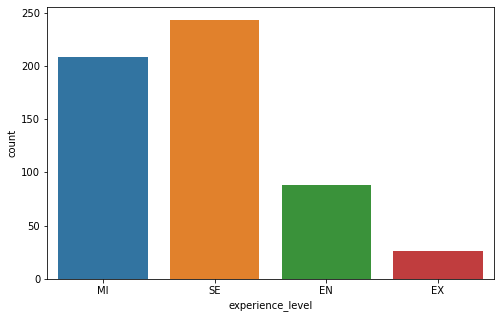

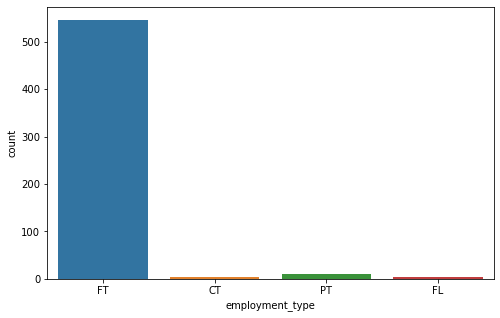

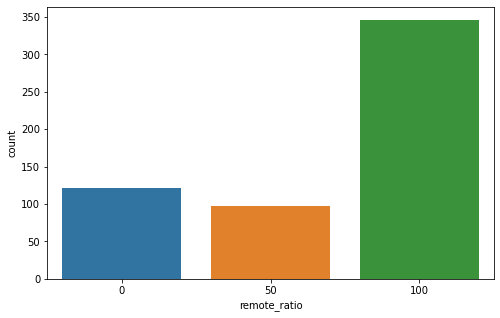

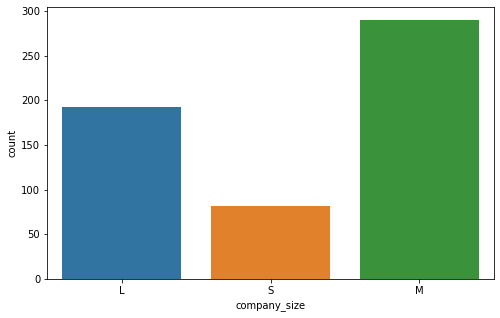

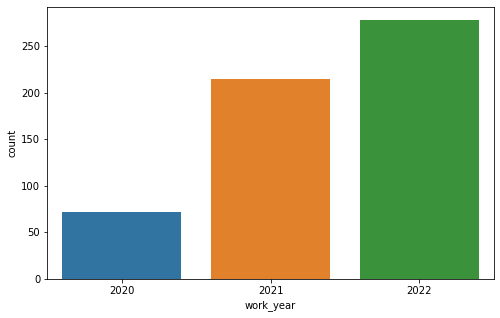

In [16]:
cat = ['experience_level', 'employment_type', 'remote_ratio', 'company_size', 'work_year']

for col in cat:
    plt.figure(figsize=(8,5))
    sns.countplot(x = col, data=df)

as per result above, we can see that based on the countplot categorical columns that:
1. Based on the experience level, Senior/Expert dominate the total number compared to other levels, only abit different with Mid/Intermediate level. and Executive/Director level has the lowest total number.
2. 96.6% of the data science employee is working as a full time data scientist, which means the difference from other types is significant.
3. More than 80% of the data scientists done the work remotely. 
4. Medium sized company (50 to 250 employees) dominate the total value of the average number of people that worked for the company during the year, and small company has the most less number of employee.
5. The number of salary paid from each year is increasing. Which 2020 has around 60-ish until 2022 has more than 250 data.

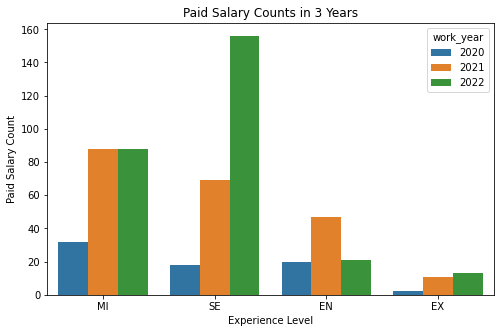

In [17]:
plt.figure(figsize = (8, 5))
sns.countplot(data=df, x = 'experience_level',hue='work_year')
plt.title('Paid Salary Counts in 3 Years')
plt.xlabel("Experience Level")
plt.ylabel("Paid Salary Count")
plt.show();

Based on the 'Paid Salary Counts in 3 Years' plot, it can be seen that in 2020, data scientist experience level dominated by mid/intermediate level, which the same as in the year 2021. But in 2022, it seems like senior/expert level dominate the experience level in data scientist field.

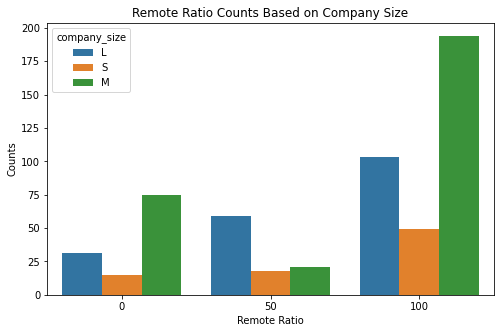

In [18]:
plt.figure(figsize = (8, 5))
sns.countplot(data=df, x = 'remote_ratio',hue='company_size')
plt.title('Remote Ratio Counts Based on Company Size')
plt.xlabel("Remote Ratio")
plt.ylabel("Counts")
plt.show();

From the 'Remote Ratio Counts Based on Company Size'  it can be seen that from all company size, data scientists are mostly working remotely, compared to work on office or partially remote. And remote working dominated by Medium sized company.

---

In this case I will drop `salary` and `salary_currency` columns, because the `salary` value is dependence with the `salary_currency`, and is converted to USD only in `currency_in_usd` column, so it's going to be easier to just 'salary_in_usd' column to analyze further.
And I'm also going to change the name from `salary_in_usd` to be `salary`.

In [19]:
df.drop(['salary', 'salary_currency'], axis=1, inplace=True)
df.rename(columns={"salary_in_usd" : "salary"}, inplace=True)

### Cardinality Check

In [20]:
for i in df.columns.tolist():
    print(f'num of unique label in {i}: ', len(df[i].unique()))

num of unique label in work_year:  3
num of unique label in experience_level:  4
num of unique label in employment_type:  4
num of unique label in job_title:  50
num of unique label in salary:  369
num of unique label in employee_residence:  57
num of unique label in remote_ratio:  3
num of unique label in company_location:  50
num of unique label in company_size:  3


Columns `job_title`, `employee_residence`, and `company_location` have more than 40 unique labels, or high cardinality. If possible we could simplify these features into its more general group.

In [21]:
df.drop('company_location', axis=1, inplace=True)

I dropped `company_location` column because it seems the same as `employee_residence` column. So might as well I will just use one of them.

#### FE: Employee Residence

In [22]:
employee_continents = []

for loc in df['employee_residence']:
    if loc in ['DE', 'EE', 'BO', 'CH', 'LU', 'IE', 'CZ', 'JE', 'GB', 'HU', 'FR', 'PL', 'PT', 'GR', 'NL', 'AT', 'ES', 'DK', 'RU', 'IT', 'HR', 'BG', 'BE', 'UA', 'MT', 'RO', 'MD', 'SI', 'RS']:
        employee_continents.append('Europe')
    elif loc in ['JP', 'IN', 'PK', 'CN', 'AE', 'PH', 'SG', 'IQ', 'VN', 'IR', 'HK', 'TR', 'MY']:
        employee_continents.append('Asia')
    elif loc in ['HN', 'US', 'MX', 'CA', 'PR']:
        employee_continents.append('North America')
    elif loc in ['BR', 'CL', 'CO', 'AR']:
        employee_continents.append('South America')
    elif loc in ['NZ', 'AU']:
        employee_continents.append('Oceania')
    elif loc in ['NG', 'DZ', 'TN', 'KE']:
        employee_continents.append('Africa')

df['employee_residence'] = employee_continents.copy()
df.rename(columns={"employee_residence" : "employee_continent"}, inplace=True)


In [23]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,employee_continent,remote_ratio,company_size
0,2020,MI,FT,Data Scientist,79833,Europe,0,L
1,2020,SE,FT,Machine Learning Scientist,260000,Asia,0,S
2,2020,SE,FT,Big Data Engineer,109024,Europe,50,M
3,2020,MI,FT,Product Data Analyst,20000,North America,0,S
4,2020,SE,FT,Machine Learning Engineer,150000,North America,50,L


For better convinience, I groupped the residences based on its continent. So it's going to be easier to analyze.

#### FE: job_title

In [24]:
retain_label = df['job_title'].value_counts().head(3).index.tolist().copy()
retain_label

['Data Scientist', 'Data Engineer', 'Data Analyst']

In [25]:
jobtitle_manipulated = []

for i in df['job_title']:
    if i in retain_label:
        jobtitle_manipulated.append(i)
    else:
        jobtitle_manipulated.append('Others')

df['job_title'] = jobtitle_manipulated.copy()
df.sample(5)

,work_year,experience_level,employment_type,job_title,salary,employee_continent,remote_ratio,company_size
548,2022,SE,FT,Data Analyst,99050,North America,100,M
124,2021,EN,PT,Data Analyst,10354,Europe,50,M
441,2022,MI,FT,Data Analyst,32974,Europe,100,M
176,2021,MI,FT,Data Scientist,2859,North America,0,S
250,2021,MI,FT,Data Scientist,115000,North America,50,L


In [29]:
df

,work_year,experience_level,employment_type,job_title,salary,employee_continent,remote_ratio,company_size
0,2020,MI,FT,Data Scientist,79833,Europe,0,L
1,2020,SE,FT,Others,260000,Asia,0,S
2,2020,SE,FT,Others,109024,Europe,50,M
3,2020,MI,FT,Others,20000,North America,0,S
4,2020,SE,FT,Others,150000,North America,50,L
...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,North America,100,M
603,2022,SE,FT,Data Engineer,126000,North America,100,M
604,2022,SE,FT,Data Analyst,129000,North America,0,M
605,2022,SE,FT,Data Analyst,150000,North America,100,M


In [134]:
df['job_title'].value_counts()

Others            232
Data Scientist    130
Data Engineer     121
Data Analyst       82
Name: job_title, dtype: int64

I also groupped the job title column to reduce the cardinality, which only left 4 categories.

## v. Data Preprocessing

### Splitting Dataset

In [135]:
#Define Data Inference
df_inf = df.sample(5, random_state=24)
df_inf

,work_year,experience_level,employment_type,job_title,salary,employee_continent,remote_ratio,company_size
423,2022,SE,FT,Data Scientist,180000,North America,0,M
196,2021,EN,FT,Others,9272,Africa,100,S
322,2022,SE,FT,Data Engineer,160080,North America,0,M
508,2022,EN,FT,Others,120000,North America,100,L
25,2020,EX,FT,Others,325000,North America,100,L


In [136]:
#Drop the data inference data from the dataset
df.drop(df_inf.index, inplace=True)

In [137]:
df.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)

### Define Features and Target

In [138]:
#Define x as features and y as target
x = df.drop('salary', axis=1)
y = df['salary']
x.head()

,work_year,experience_level,employment_type,job_title,employee_continent,remote_ratio,company_size
0,2020,MI,FT,Data Scientist,Europe,0,L
1,2020,SE,FT,Others,Asia,0,S
2,2020,SE,FT,Others,Europe,50,M
3,2020,MI,FT,Others,North America,0,S
4,2020,SE,FT,Others,North America,50,L


In [139]:
#Train-set and Test-set Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=24)

print("Train Size : ", x_train.shape)
print("Test Size : ", x_test.shape)

Train Size :  (448, 7)
Test Size :  (112, 7)


In [140]:
df_eda = pd.concat([x_train, y_train], axis=1)
df_eda.shape

(448, 8)

### Encoding

In this case, I will use to different technique of encoding to encode each categorical columns from the dataset. Ordinal Encode and One Hot Encoder.

In [141]:
ordinal_col = ['work_year', 'experience_level', 'company_size', 'employee_continent']
ohe_col = ['employment_type', 'job_title', 'remote_ratio']

#### Ordinal Encoder

For ordinal encoding, I am going to encode `work_year`, `experience_level`, `company_size`, `employee_continent` columns.

In [142]:
#Ordinal Encoder
year = ['2020', '2021', '2022']
experience = ['MI', 'SE', 'EN', 'EX']
company = ['S', 'M', 'L']
continent = ['Europe', 'Asia', 'North America', 'South America', 'Oceania', 'Africa']

ord_enc = OrdinalEncoder(categories=[year, experience, company, continent])
cat_ord = pd.DataFrame(ord_enc.fit_transform(df_eda[['work_year', 'experience_level', 'company_size', 'employee_continent']]))

cat_ord.columns = ['work_year', 'experience_level', 'company_size', 'employee_continent']
review = pd.concat([df_eda[['work_year', 'experience_level', 'company_size', 'employee_continent']].reset_index(drop=True), cat_ord], axis=1)

review

,work_year,experience_level,company_size,employee_continent,work_year,experience_level,company_size,employee_continent
0,2021,MI,S,Asia,1.0,0.0,0.0,1.0
1,2022,SE,M,North America,2.0,1.0,1.0,2.0
2,2021,MI,L,North America,1.0,0.0,2.0,2.0
3,2021,MI,L,Europe,1.0,0.0,2.0,0.0
4,2022,SE,L,South America,2.0,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...
443,2021,MI,M,Europe,1.0,0.0,1.0,0.0
444,2022,MI,L,North America,2.0,0.0,2.0,2.0
445,2022,SE,M,North America,2.0,1.0,1.0,2.0
446,2021,SE,L,North America,1.0,1.0,2.0,2.0


In [143]:
df_eda.drop(['work_year', 'experience_level', 'company_size', 'employee_continent'], axis=1, inplace=True)

In [144]:
df_eda = pd.concat([df_eda.reset_index(drop=True), cat_ord], axis=1)
df_eda.head()

,employment_type,job_title,remote_ratio,salary,work_year,experience_level,company_size,employee_continent
0,FT,Others,50,63711,1.0,0.0,0.0,1.0
1,FT,Others,100,208775,2.0,1.0,1.0,2.0
2,FT,Data Scientist,0,73000,1.0,0.0,2.0,2.0
3,FT,Others,50,69999,1.0,0.0,2.0,0.0
4,FT,Others,100,60000,2.0,1.0,2.0,3.0


#### One Hot Encoding

For One Hot Encoding, I am going to encode `employment_type`, `job_title`, `remote_ratio` columns.

In [145]:
df_eda[['employment_type', 'job_title', 'remote_ratio']].head()

,employment_type,job_title,remote_ratio
0,FT,Others,50
1,FT,Others,100
2,FT,Data Scientist,0
3,FT,Others,50
4,FT,Others,100


In [146]:
#One Hot Encoder
ohe_enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

cat_ohe = pd.DataFrame(ohe_enc.fit_transform(df_eda[['employment_type', 'job_title', 'remote_ratio']]))
cat_ohe.columns = ohe_enc.get_feature_names(['employment_type', 'job_title', 'remote_ratio'])

review = pd.concat([df_eda[['employment_type', 'job_title', 'remote_ratio']].reset_index(drop=True), cat_ohe], axis=1)
review

,employment_type,job_title,remote_ratio,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,job_title_Data Analyst,job_title_Data Engineer,job_title_Data Scientist,job_title_Others,remote_ratio_0,remote_ratio_50,remote_ratio_100
0,FT,Others,50,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,FT,Others,100,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,FT,Data Scientist,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,FT,Others,50,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,FT,Others,100,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,FT,Others,50,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
444,FT,Others,100,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
445,FT,Others,100,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
446,FT,Others,100,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [147]:
df_eda.drop(['employment_type', 'job_title', 'remote_ratio'], axis=1, inplace=True)

In [148]:
df_eda= pd.concat([df_eda.reset_index(drop=True), cat_ohe], axis=1)
df_eda.head()

,salary,work_year,experience_level,company_size,employee_continent,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,job_title_Data Analyst,job_title_Data Engineer,job_title_Data Scientist,job_title_Others,remote_ratio_0,remote_ratio_50,remote_ratio_100
0,63711,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,208775,2.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,73000,1.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,69999,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,60000,2.0,1.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### Feature Selection

<AxesSubplot:>

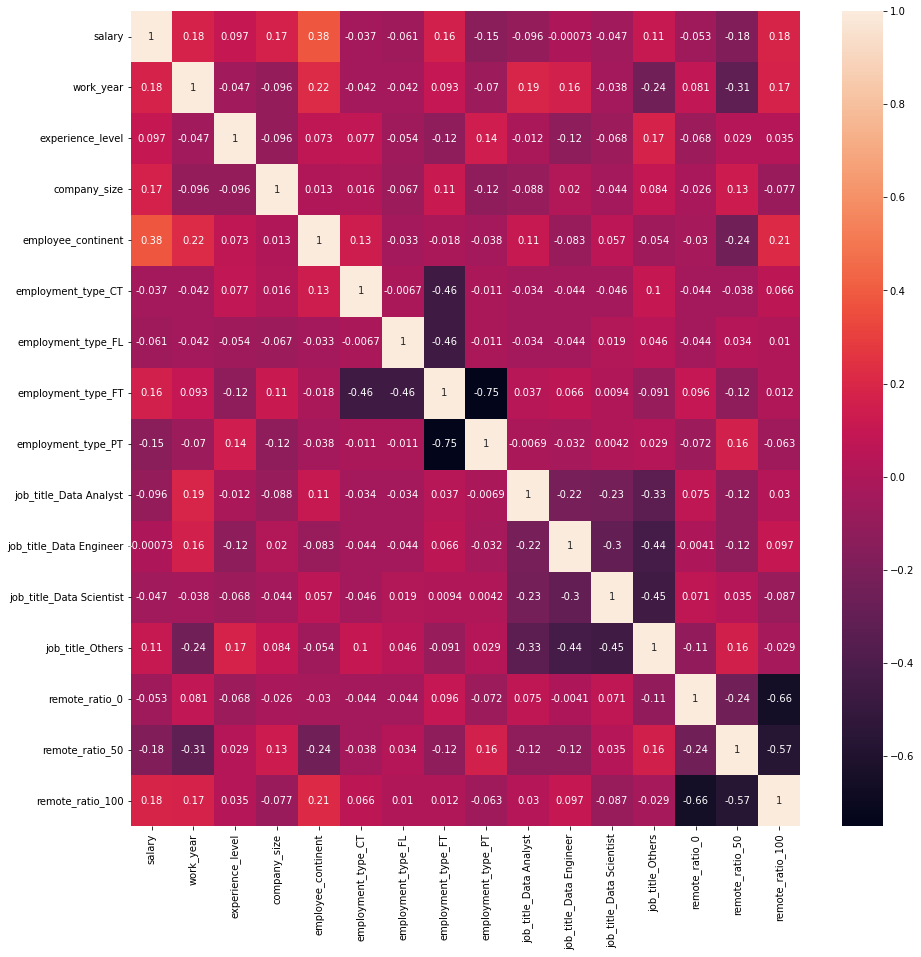

In [149]:
plt.figure(figsize=(15,15))
sns.heatmap(df_eda.corr(),annot=True)

### Pipeline

Make a pipleline contains feature engineering that had been handled by ordinal encoder for categorical columns that is chosen which are `work_year`, `experience_level`, `company_size` and `employee_continent`.

In [150]:
#Ordinal Pipeline
ordinal_pipeline = Pipeline([
        ('ordinal_enc', OrdinalEncoder(categories=[['2020', '2021', '2022'], ['MI', 'SE', 'EN', 'EX'], ['S', 'M', 'L'], ['Europe', 'Asia', 'North America', 'South America', 'Oceania', 'Africa']]))
        ])

ord_tr = ordinal_pipeline.fit_transform(x_train[['work_year', 'experience_level', 'company_size', 'employee_continent']])
ord_tr

array([[1., 0., 0., 1.],
       [2., 1., 1., 2.],
       [1., 0., 2., 2.],
       ...,
       [2., 1., 1., 2.],
       [1., 1., 2., 2.],
       [2., 0., 1., 0.]])

Create pipeline contains the categorical columns that had been handled by One Hot Encoder which are `employment_type`, `job_title`, and `remote_ratio`.

In [151]:
#One Hot Encoder Pipeline 
ohe_pipeline = Pipeline([
        ('ohe_enc', OneHotEncoder(sparse=False, handle_unknown='ignore'))
    ])

ohe_tr = ohe_pipeline.fit_transform(x_train[['employment_type', 'job_title', 'remote_ratio']])
ohe_tr

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

### Full Pipeline

Merge all the pipeline that is just done before which are ordinal pipeline and one hot encoder pipeline become one then use it in data training.

In [152]:
#Full Pipeline
full_pipeline = ColumnTransformer([
        ("cat_ord", ordinal_pipeline, ['work_year', 'experience_level', 'company_size', 'employee_continent']),
        ("cat_ohe", ohe_pipeline, ['employment_type', 'job_title', 'remote_ratio']),
    ])

train_tr = full_pipeline.fit_transform(x_train)
train_tr

array([[1., 0., 0., ..., 0., 1., 0.],
       [2., 1., 1., ..., 0., 0., 1.],
       [1., 0., 2., ..., 1., 0., 0.],
       ...,
       [2., 1., 1., ..., 0., 0., 1.],
       [1., 1., 2., ..., 0., 0., 1.],
       [2., 0., 1., ..., 0., 0., 1.]])

#### Implement Pipeline to Test-set

In [153]:
test_tr = full_pipeline.transform(x_test)
test_tr

array([[1., 0., 2., ..., 0., 0., 1.],
       [2., 0., 0., ..., 0., 0., 1.],
       [2., 0., 2., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [2., 1., 1., ..., 0., 0., 1.]])

## vi. Model Definition

In [154]:
#Linear Regression
lr_model = LinearRegression()

In [155]:
#Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=0)

In [156]:
#Random Forest Regressor
rf_model = RandomForestRegressor(random_state=0)

In [157]:
#Ridge
rid_model = Ridge()

## vii. Model Training

In [158]:
lr_model.fit(train_tr, y_train)

LinearRegression()

In [159]:
dt_model.fit(train_tr, y_train)

DecisionTreeRegressor(random_state=0)

In [160]:
rf_model.fit(train_tr, y_train)

RandomForestRegressor(random_state=0)

In [161]:
rid_model.fit(train_tr, y_train)

Ridge()

## viii. Model Evaluation

In [162]:
pred_train_lr = lr_model.predict(train_tr)
pred_test_lr = lr_model.predict(test_tr)

print("="*20,"TRAINING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,pred_train_lr))
print("R2 Score:",r2_score(y_train,pred_train_lr))
print("="*20,"TEST","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,pred_test_lr))
print("R2 Score:",r2_score(y_test,pred_test_lr))

==================== TRAINING ====================
Mean absolute error: 42672.36218505386
R2 Score: 0.2605439662968507
==================== TEST ====================
Mean absolute error: 40279.74767588691
R2 Score: 0.13753483949295076


In [163]:
pred_train_dt = dt_model.predict(train_tr)
pred_test_dt = dt_model.predict(test_tr)

print("="*20,"TRAINING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,pred_train_dt))
print("R2 Score:",r2_score(y_train,pred_train_dt))
print("="*20,"TEST","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,pred_test_dt))
print("R2 Score:",r2_score(y_test,pred_test_dt))

==================== TRAINING ====================
Mean absolute error: 16889.986864902214
R2 Score: 0.8116686699185635
==================== TEST ====================
Mean absolute error: 42104.8053925737
R2 Score: 0.2728362739865091


In [164]:
pred_train_rf = rf_model.predict(train_tr)
pred_test_rf = rf_model.predict(test_tr)

print("="*20,"TRAINING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,pred_train_rf))
print("R2 Score:",r2_score(y_train,pred_train_rf))
print("="*20,"TEST","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,pred_test_rf))
print("R2 Score:",r2_score(y_test,pred_test_rf))

==================== TRAINING ====================
Mean absolute error: 22769.121935492552
R2 Score: 0.7725587081073676
==================== TEST ====================
Mean absolute error: 37291.44013618566
R2 Score: 0.358791643320585


In [165]:
pred_train_rid = rid_model.predict(train_tr)
pred_test_rid = rid_model.predict(test_tr)

print("="*20,"TRAINING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,pred_train_rid))
print("R2 Score:",r2_score(y_train,pred_train_rid))
print("="*20,"TEST","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,pred_test_rid))
print("R2 Score:",r2_score(y_test,pred_test_rid))

==================== TRAINING ====================
Mean absolute error: 42624.91293231508
R2 Score: 0.2602744762200989
==================== TEST ====================
Mean absolute error: 40015.07404748251
R2 Score: 0.16396136859848198


From all these four models that's just being analyzed, it can be seen that Random Forest Regressor is the best model to be used in salary prediction which the MAE is 37291.44 and the R2 score is 0.3588. So it means that I will use Random Forest as the model that I am going to implement in the next analysis.

### Hyperparameter Tuning

In [166]:
params = {
    'bootstrap': [True],
    'max_depth': [80, 90],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 300, 1000]
}

grid_search = GridSearchCV(rf_model, params,
                           scoring='r2',
                           return_train_score=True)
grid_search.fit(train_tr, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 300, 1000]},
             return_train_score=True, scoring='r2')

In [167]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 300}

In [168]:
grid_search.best_score_

0.35899662348220873

In [169]:
best_model = grid_search.best_estimator_
best_model

RandomForestRegressor(max_depth=80, max_features=3, min_samples_leaf=3,
                      min_samples_split=12, n_estimators=300, random_state=0)

In [170]:
pred_train_dt_tuning = best_model.predict(train_tr)
pred_test_dt_tuning = best_model.predict(test_tr)

print("="*20,"TRAINING AFTER TUNING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,pred_train_dt_tuning))
print("R2 Score:",r2_score(y_train,pred_train_dt_tuning))

print("="*20,"TRAINING BEFORE TUNING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,pred_train_dt))
print("R2 Score:",r2_score(y_train,pred_train_dt))

print("="*20,"TEST AFTER TUNING","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,pred_test_dt_tuning))
print("R2 Score:",r2_score(y_test,pred_test_dt_tuning))

print("="*20,"TEST BEFORE TUNING","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,pred_test_dt))
print("R2 Score:",r2_score(y_test,pred_test_dt))

==================== TRAINING AFTER TUNING ====================
Mean absolute error: 34647.17090681884
R2 Score: 0.4899227612151307
==================== TRAINING BEFORE TUNING ====================
Mean absolute error: 16889.986864902214
R2 Score: 0.8116686699185635
==================== TEST AFTER TUNING ====================
Mean absolute error: 35571.01844362585
R2 Score: 0.3695857700656596
==================== TEST BEFORE TUNING ====================
Mean absolute error: 42104.8053925737
R2 Score: 0.2728362739865091


After doing Hyperparameter Tuning, we got the best hyperparameter on Random Forest which are:
```
{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 300}
 ```


#### Combine Pipeline 

In [171]:
full_pipeline

ColumnTransformer(transformers=[('cat_ord',
                                 Pipeline(steps=[('ordinal_enc',
                                                  OrdinalEncoder(categories=[['2020',
                                                                              '2021',
                                                                              '2022'],
                                                                             ['MI',
                                                                              'SE',
                                                                              'EN',
                                                                              'EX'],
                                                                             ['S',
                                                                              'M',
                                                                              'L'],
                                                                             ['Europe',
                                                                              'Asia',
                                                                              'North '
                                                                              'America',
                                                                              'South '
                                                                              'America',
                                                                              'Oceania',
                                                                              'Africa']]))]),
                                 ['work_year', 'experience_level',
                                  'company_size', 'employee_continent']),
                                ('cat_ohe',
                                 Pipeline(steps=[('ohe_enc',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['employment_type', 'job_title',
                                  'remote_ratio'])])

In [172]:
all_process = Pipeline([
    ("preprocess", full_pipeline),
    ("classification", best_model)
])

all_process.fit(x_train, y_train)
hasil = all_process.predict(x_test)

print("Mean absolute error:",mean_absolute_error(y_test,hasil))
print("R2 Score:",r2_score(y_test,hasil))

Mean absolute error: 35571.01844362585
R2 Score: 0.3695857700656596


## ix. Model Inference

After all the analysis above, it's time to proof and implement the best model to the original data which is not handled.

In [173]:
df_inf

,work_year,experience_level,employment_type,job_title,salary,employee_continent,remote_ratio,company_size
0,2022,SE,FT,Data Scientist,180000,North America,0,M
1,2021,EN,FT,Others,9272,Africa,100,S
2,2022,SE,FT,Data Engineer,160080,North America,0,M
3,2022,EN,FT,Others,120000,North America,100,L
4,2020,EX,FT,Others,325000,North America,100,L


In [174]:
all_process.predict(df_inf)

array([134368.54964778,  99990.54061202, 127247.84381528, 160109.98877811,
       191054.8484497 ])

## x. Model Saving

In [181]:
with open('model_pkl', 'wb') as files:
    pickle.dump(all_process, files)

In [175]:
pickle.dump(all_process, open("salary_pred.pkl", "wb"))

In [176]:
set_config(display='diagram')

In [177]:
all_process

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_ord',
                                                  Pipeline(steps=[('ordinal_enc',
                                                                   OrdinalEncoder(categories=[['2020',
                                                                                               '2021',
                                                                                               '2022'],
                                                                                              ['MI',
                                                                                               'SE',
                                                                                               'EN',
                                                                                               'EX'],
                                                                                              ['S',
                                                                                               'M',
                                                                                               'L'],
                                                                                              ['Europe',
                                                                                               'Asia',
                                                                                               'North '
                                                                                               'America',
                                                                                               'South '
                                                                                               'America',
                                                                                               'Oceania',
                                                                                               'Africa']]))]),
                                                  ['work_year',
                                                   'experience_level',
                                                   'company_size',
                                                   'employee_continent']),
                                                 ('cat_ohe',
                                                  Pipeline(steps=[('ohe_enc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['employment_type',
                                                   'job_title',
                                                   'remote_ratio'])])),
                ('classification',
                 RandomForestRegressor(max_depth=80, max_features=3,
                                       min_samples_leaf=3, min_samples_split=12,
                                       n_estimators=300, random_state=0))])

### Model Inference - DEPLOY

In [178]:
# STEP 1 - Import saved model
model = pickle.load(open("salary_pred.pkl", "rb"))

In [179]:
# STEP 2 - model predict input data
clas = model.predict(df_inf).tolist()
clas

[134368.54964778415,
 99990.54061201919,
 127247.84381528368,
 160109.98877811083,
 191054.8484497049]

In [180]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,560.0,2021.364286,0.697152,2020.0,2021.00,2021.0,2022.0,2022.0
salary,560.0,110179.450000,71814.351461,2859.0,60567.75,100000.0,150000.0,600000.0
remote_ratio,560.0,70.000000,40.810220,0.0,50.00,100.0,100.0,100.0


## xi. Conclusion

Based on the overall analysis we just done, it can be concluded that:

1. Based on the experience level, Senior/Expert dominate the total number compared to other levels, only abit different with Mid/Intermediate level. and Executive/Director level has the lowest total number.
2. 96.6% of the data science employee is working as a full time data scientist, which means the difference from other types is significant.
3. More than 80% of the data scientists done the work remotely. 
4. Medium sized company (50 to 250 employees) dominate the total value of the average number of people that worked for the company during the year, and small company has the most less number of employee.
5. The number of salary paid from each year is increasing. Which 2020 has around 60-ish until 2022 has more than 250 data.
6. Data scientist experience level in 2020 dominated by mid/intermediate level, which the same as in the year 2021. But in 2022, it seems like senior/expert level dominate the experience level in data scientist field.
7. From all these four models that's just being analyzed, Random Forest Regressor is the best model to be used in salary prediction which is:
```
    MAE = 37291.44
    R2 score = 0.3588
```
8. After tuning, based on the MAE and R2 score in the test score it can be seen that the model is getting improved.
```
    - Test Before Tuning : 
        Mean absolute error: 42104.8053925737
        R2 Score: 0.2728362739865091

    - Test Ater Tuning :
        Mean absolute error: 35571.01844362585
        R2 Score: 0.3695857700656596
```
